<a href="https://colab.research.google.com/github/leenago/Asiae_edu/blob/master/Industrial_Bigdata/200916_%EB%84%A4%EC%9D%B4%EB%B2%84%EC%A6%9D%EA%B6%8C%ED%81%AC%EB%A1%A4%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 주가정보 획득 작업
* 마케팅 포인트와 주가와의 상관관계 분석을 하고자 한다.
* 식품기업 위주의 주가분석을 하기로 했다.
* '네이버 증권' 페이지에 가서 관심있는 회사의 주가정보를 크롤링했다.(https://finance.naver.com/item/sise_day.nhn?code=097950&page=1)



# 1. 사전작업
- 필요 패키지 설치하기

In [1]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
#맨 처음 실행 후
#런타임 -> 런타임 다시시작 -> 이 셀은 실행하지 않고 밑셀부터 다시 시작

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144600 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()


import requests
from bs4 import BeautifulSoup as bs

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#2. 네이버 증권 웹크롤링
- CJ제일제당 코드: 097950

In [2]:
def one_page_crawling(code,page):
  url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
  df = pd.read_html(url)[0]
  df.dropna(inplace=True)
  return df

In [3]:
one_page_crawling('097950',3)

,날짜,종가,전일비,시가,고가,저가,거래량
1,2020.08.20,400500.0,2000.0,400000.0,420000.0,399000.0,138623.0
2,2020.08.19,402500.0,500.0,408000.0,412500.0,402000.0,76931.0
3,2020.08.18,403000.0,2000.0,407000.0,421000.0,398000.0,133759.0
4,2020.08.14,401000.0,13000.0,413000.0,417000.0,397500.0,121448.0
5,2020.08.13,414000.0,500.0,418500.0,425000.0,405500.0,163946.0
9,2020.08.12,414500.0,29000.0,438500.0,451000.0,413000.0,277899.0
10,2020.08.11,443500.0,16500.0,427000.0,443500.0,407000.0,194475.0
11,2020.08.10,427000.0,3000.0,425500.0,431000.0,422500.0,67787.0
12,2020.08.07,424000.0,4000.0,422000.0,428500.0,413000.0,89595.0
13,2020.08.06,420000.0,2500.0,420000.0,428000.0,413500.0,70190.0


In [4]:
def several_page_crawling(code,page):
  url = 'https://finance.naver.com/item/sise_day.nhn?code={code}&page={page}'.format(code=code, page=page)
  df = pd.DataFrame()
  for i in range(1, page+1):
    new_df = one_page_crawling(code, i)
    df = pd.concat([df,new_df], axis=0)
  df.dropna(inplace = True)
  df.reset_index(inplace=True, drop=True)
  return df

In [5]:
several_page_crawling('097950',2)

,날짜,종가,전일비,시가,고가,저가,거래량
0,2020.09.17,387000.0,6000.0,393000.0,396000.0,386000.0,51334.0
1,2020.09.16,393000.0,1000.0,395000.0,402000.0,392500.0,48945.0
2,2020.09.15,394000.0,2000.0,392000.0,396000.0,388000.0,47654.0
3,2020.09.14,392000.0,11500.0,403500.0,404000.0,388000.0,100636.0
4,2020.09.11,403500.0,2000.0,401500.0,416500.0,399500.0,108033.0
5,2020.09.10,401500.0,26000.0,381500.0,404500.0,380000.0,172970.0
6,2020.09.09,375500.0,14000.0,385000.0,388500.0,373000.0,138771.0
7,2020.09.08,389500.0,0.0,392500.0,396000.0,389500.0,60046.0
8,2020.09.07,389500.0,7000.0,399000.0,399500.0,387500.0,72911.0
9,2020.09.04,396500.0,5000.0,394500.0,400000.0,393000.0,69718.0


In [6]:
cj_stock_all = several_page_crawling('097950',321)
cj_stock_all

,날짜,종가,전일비,시가,고가,저가,거래량
0,2020.09.17,387000.0,6000.0,393000.0,396000.0,386000.0,51334.0
1,2020.09.16,393000.0,1000.0,395000.0,402000.0,392500.0,48945.0
2,2020.09.15,394000.0,2000.0,392000.0,396000.0,388000.0,47654.0
3,2020.09.14,392000.0,11500.0,403500.0,404000.0,388000.0,100636.0
4,2020.09.11,403500.0,2000.0,401500.0,416500.0,399500.0,108033.0
...,...,...,...,...,...,...,...
3204,2007.10.05,252500.0,2500.0,255000.0,257000.0,245000.0,112563.0
3205,2007.10.04,255000.0,10000.0,247000.0,263000.0,241000.0,221795.0
3206,2007.10.02,245000.0,25000.0,229000.0,247500.0,226000.0,239345.0
3207,2007.10.01,220000.0,10000.0,230000.0,233000.0,220000.0,267416.0


#3. Google BigQuery와 연동하기
- 크롤링 한 정보들을 **Google BigQuery**에 업로드한다.
- 새로이 알게된 방식이기 때문에, 이 코드는 잘 안고 가기로 한다. 

In [7]:
from pandas.io import gbq

#BigQuery는 영어 column명만 취급한다.
cj_stock_all_eng = cj_stock_all.copy()
cj_stock_all_eng.columns = ['DATE','CLOSEP','COMPARE','OPENP','HIGHP','LOWP','VOL']

cj_stock_all_eng.to_gbq(destination_table = 'NaverStock.CJ_cj',
                        project_id = 'stockcj',
                        if_exists='replace')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=4rOorhwXt7spqGtFgvTAAOGnMHBkjo&prompt=consent&access_type=offline
Enter the authorization code: 4/4QFlyLxkHHo_b_SEHCEeHxEPNON7RnR41udAVWoEDPc0McsfVEC-cSs


1it [00:04,  4.52s/it]


# 4. 종가 최고치 찾기

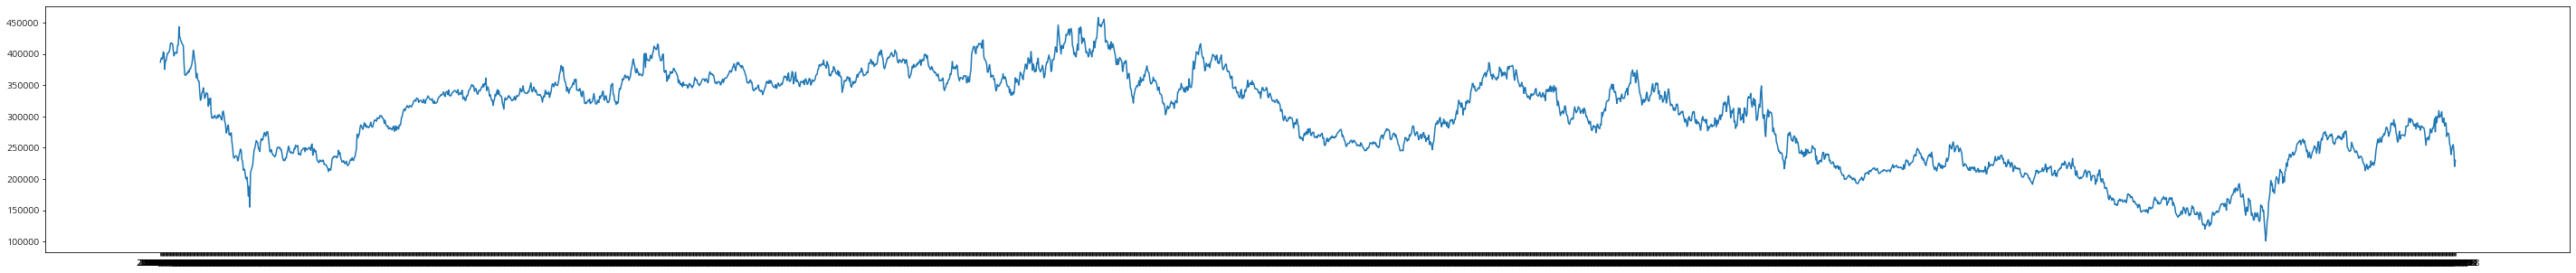

In [8]:
x = cj_stock_all['날짜']
y = cj_stock_all['종가']

plt.figure(figsize=[50,5])
plt.plot(list(x),list(y))

In [9]:
cj_stock_all[cj_stock_all['종가']==cj_stock_all['종가'].max()]

,날짜,종가,전일비,시가,고가,저가,거래량
1311,2015.05.21,458500.0,11000.0,448000.0,460500.0,446000.0,47131.0


In [10]:
#해당 정보들이 어떤 내용들을 담고 있는지 알아보기
max_x = cj_stock_all[1300:1320]['날짜']
max_y = cj_stock_all[1300:1320]['종가']
max_z = cj_stock_all[1300:1320]['거래량']
print(max_x, max_y, max_z)

1300    2015.06.08
1301    2015.06.05
1302    2015.06.04
1303    2015.06.03
1304    2015.06.02
1305    2015.06.01
1306    2015.05.29
1307    2015.05.28
1308    2015.05.27
1309    2015.05.26
1310    2015.05.22
1311    2015.05.21
1312    2015.05.20
1313    2015.05.19
1314    2015.05.18
1315    2015.05.15
1316    2015.05.14
1317    2015.05.13
1318    2015.05.12
1319    2015.05.11
Name: 날짜, dtype: object 1300    403000.0
1301    402000.0
1302    395500.0
1303    406000.0
1304    404000.0
1305    420500.0
1306    410000.0
1307    418500.0
1308    424500.0
1309    425500.0
1310    444500.0
1311    458500.0
1312    447500.0
1313    445000.0
1314    447000.0
1315    443500.0
1316    447000.0
1317    450500.0
1318    451500.0
1319    455500.0
Name: 종가, dtype: float64 1300    36426.0
1301    43194.0
1302    71777.0
1303    52018.0
1304    77343.0
1305    49794.0
1306    56305.0
1307    32993.0
1308    81908.0
1309    92660.0
1310    80727.0
1311    47131.0
1312    43723.0
1313    44781.0
1314   

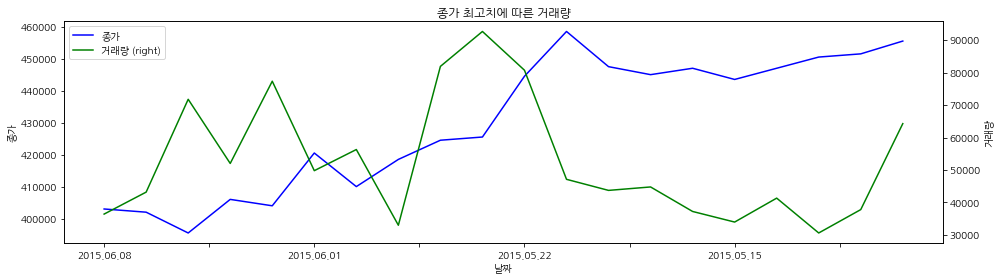

In [11]:
#종가 최고치에 따른 거래량 시각화하기
plt.rcParams['figure.figsize'] = (14,4)
ax1 = cj_stock_all[1300:1320].plot(kind = 'line', x='날짜', y='종가', color='Blue')
ax2 = cj_stock_all[1300:1320].plot(kind = 'line', x='날짜', y='거래량',secondary_y=True, color='Green', ax=ax1)

ax1.set_ylabel('종가')
ax2.set_ylabel('거래량')

plt.title('종가 최고치에 따른 거래량')
plt.tight_layout()
plt.show()

- 종가가 high 할 때 거래량이 낮네
- 근데 2015년 15 이후 보면 늘 그런 것만은 아니구,,,

#5. 종가 최저치 찾기

In [12]:
cj_stock_all[cj_stock_all['종가']== cj_stock_all['종가'].min()]

,날짜,종가,전일비,시가,고가,저가,거래량
2943,2008.10.27,101000.0,12500.0,105500.0,113000.0,96500.0,213114.0


In [19]:
#해당 정보들이 어떤 내용들을 담고 있는지 알아보기
min_x = cj_stock_all[2930:2950]['날짜']
min_y = cj_stock_all[2930:2950]['종가']
min_z = cj_stock_all[2930:2950]['거래량']
print(min_x, min_y, min_z)

2930    2008.11.13
2931    2008.11.12
2932    2008.11.11
2933    2008.11.10
2934    2008.11.07
2935    2008.11.06
2936    2008.11.05
2937    2008.11.04
2938    2008.11.03
2939    2008.10.31
2940    2008.10.30
2941    2008.10.29
2942    2008.10.28
2943    2008.10.27
2944    2008.10.24
2945    2008.10.23
2946    2008.10.22
2947    2008.10.21
2948    2008.10.20
2949    2008.10.17
Name: 날짜, dtype: object 2930    139500.0
2931    146000.0
2932    143000.0
2933    135000.0
2934    132000.0
2935    135000.0
2936    158500.0
2937    155500.0
2938    156500.0
2939    148000.0
2940    150000.0
2941    130500.0
2942    115000.0
2943    101000.0
2944    113500.0
2945    133000.0
2946    139000.0
2947    163000.0
2948    169000.0
2949    180000.0
Name: 종가, dtype: float64 2930     72816.0
2931     71420.0
2932    115479.0
2933    176332.0
2934    445985.0
2935    117531.0
2936     82211.0
2937     46135.0
2938     45926.0
2939    109403.0
2940     88537.0
2941    165631.0
2942    137312.0
2943    21

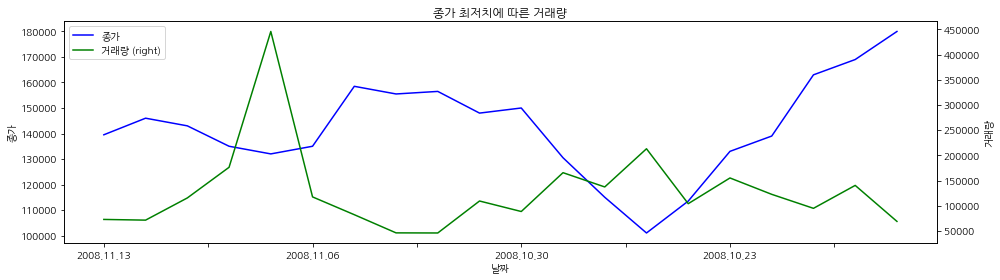

In [17]:
#종가 최저치에 따른 거래량 시각화하기

plt.rcParams['figure.figsize'] = (14,4)
ax1 = cj_stock_all[2930:2950].plot(kind='line', x='날짜', y='종가', color ='Blue')
ax2 = cj_stock_all[2930:2950].plot(kind='line', x='날짜',y='거래량', secondary_y=True, color='Green', ax=ax1)

ax1.set_ylabel('종가')
ax2.set_ylabel('거래량')

plt.title('종가 최저치에 따른 거래량')
plt.tight_layout()
plt.show()

- 종가가 high - 거래량 low
- 무슨 상관관계가 있는걸까..?!
- 주식과 관련한 정보들 공부도 필요하다고 생각된다.

##### Special Thanks, 원영님 :)